In [ ]:
from utils import *
import pandas as pd
import numpy as np
from math import *
import matplotlib.pyplot as plt

In [2]:
combine = pd.read_excel('C:/Users/pensh/Desktop/VSCode/DataBase/Data/Draft/Beast2025.xlsx', sheet_name='Combine')
proday = pd.read_excel('C:/Users/pensh/Desktop/VSCode/DataBase/Data/Draft/Beast2025.xlsx', sheet_name='ProDay')
combine.columns = [str(i) for i in combine.columns]
proday.columns = [str(i) for i in proday.columns]
df = pd.concat([combine, proday])

#  Clean the df
df = df.replace('DNP', -99999)
df = df.replace(np.nan, -99999)
df[['RK', 'HT', 'WT', 'BP']] = df[['RK', 'HT', 'WT', 'BP']].astype(int)
df[['HAND', 'ARM', 'WING', '40', '20', '10', 'VJ', 'SS', '3C', 'AGE']] = df[['HAND', 'ARM', 'WING', '40', '20', '10', 'VJ', 'SS', '3C', 'AGE']].astype(float)
df[['Name', 'POS', 'SCHOOL', 'Grade', 'Year']] = df[['Name', 'POS', 'SCHOOL', 'Grade', 'Year']].astype(str)
df = df.replace(-99999, np.nan)
df = df.replace('-99999', np.nan)

#  Keep a copy of the original
original = df.copy()

#  Get a list of positions
positions = list(df['POS'].unique())
if "K" in positions:
    positions.remove("K")
if "P" in positions:
    positions.remove("P")
if "LS" in positions:
    positions.remove("LS")

df['HT_IN'] = combine_height_to_inches(df['HT'])
df['HT_IN'] = df['HT_IN'].astype(float)
df['BMI'] = 703 * (df['WT'] / (df['HT_IN'] ** 2))
df['BMI']

0       28.401994
1       27.587764
2       28.435919
3       26.051287
4       27.952462
          ...    
2657    25.064795
2658    27.492864
2659    27.533507
2660    23.651347
2661    27.590965
Name: BMI, Length: 5324, dtype: float64

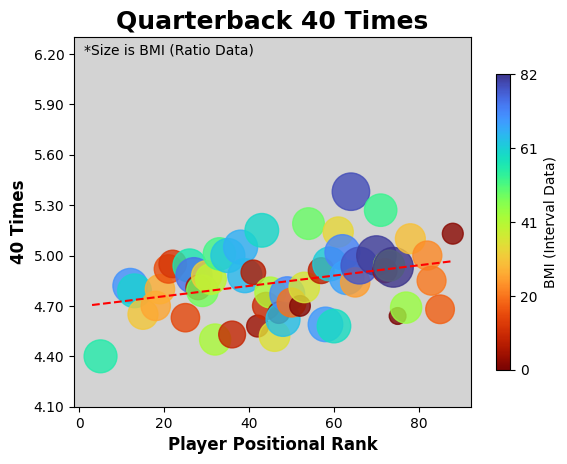

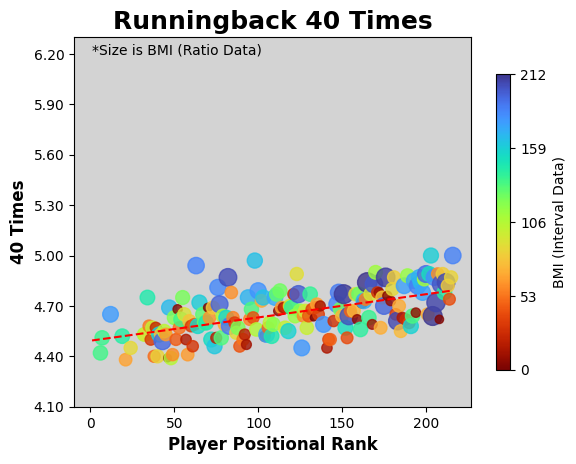

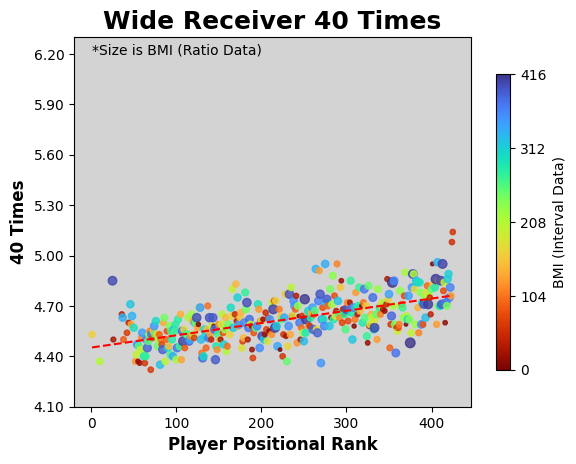

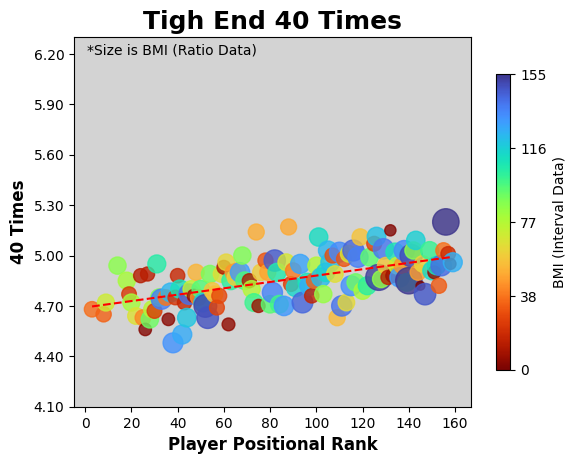

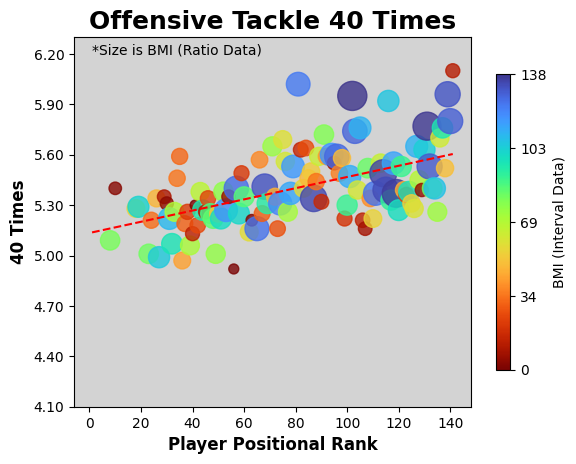

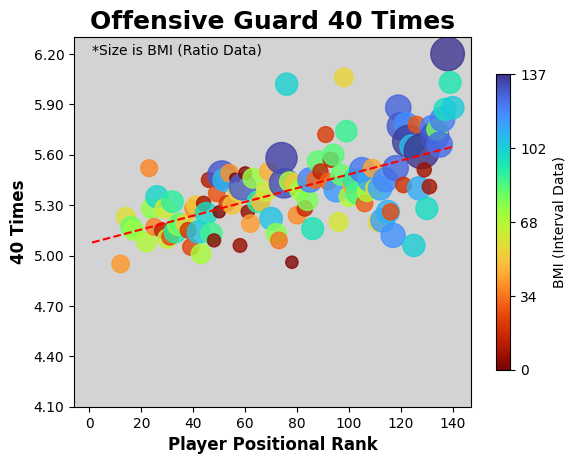

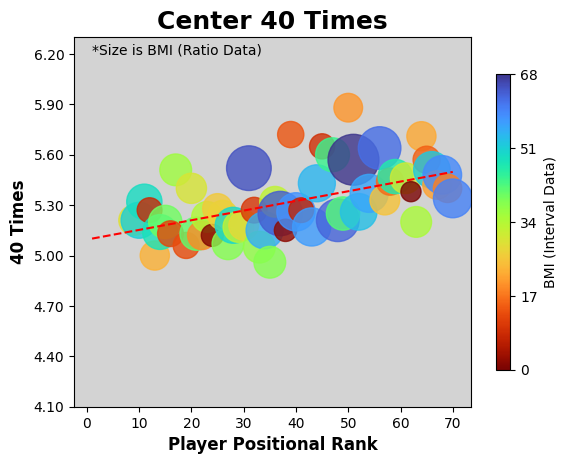

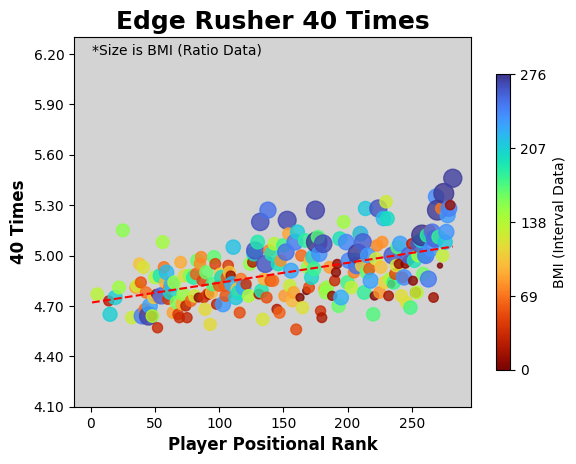

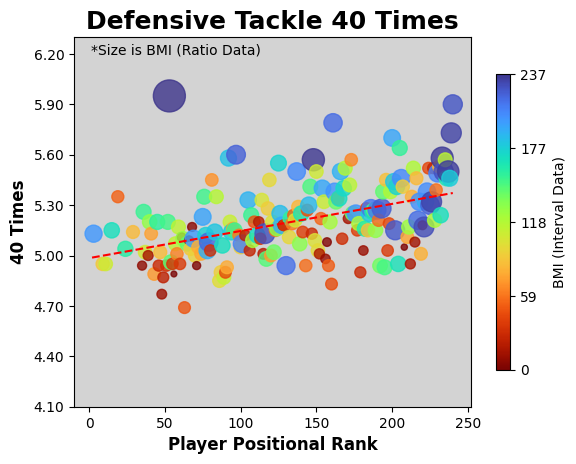

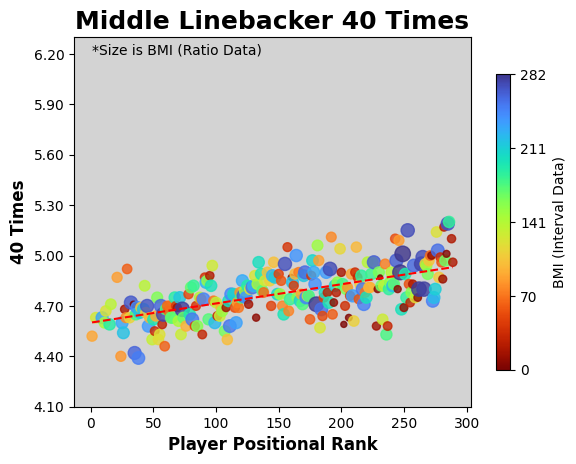

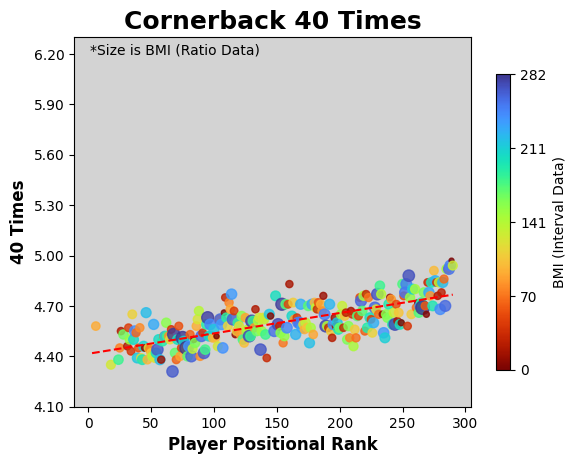

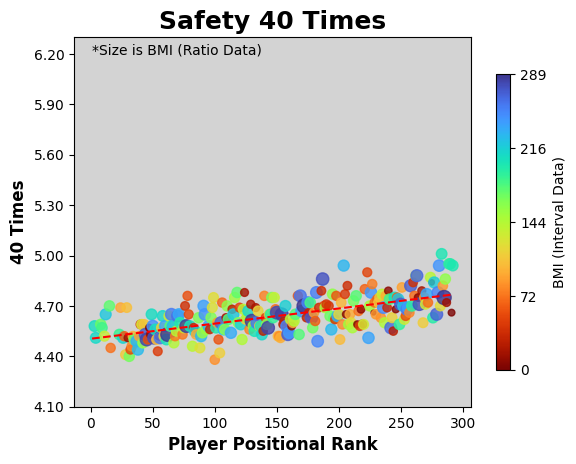

In [ ]:
#  Get a single instance of every player
df = df[(df['HT'].notna()) & (df['Type'] == 'p')]

#  Plotting 40 times with BMI in color
for pos in positions:
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    temp = df[df['POS'] == pos].copy()

    #  Prep data
    temp['BMI_FROM_MEAN'] = temp['BMI'] - temp['BMI'].mean()
    temp['BMI_TYPE'] = np.where(temp['BMI_FROM_MEAN'] > 0, '+', '-')
    temp['BMI_FROM_MEAN_TO_PLOT'] = temp['BMI_FROM_MEAN'] + abs(temp['BMI_FROM_MEAN'].min()) + 5
    temp['COLOR_RK'] = temp['BMI_FROM_MEAN'].rank()

    #  Set x and y values
    x = temp['RK'].astype(int)
    y = temp['40'].astype(float)
    
    #  Plot data
    ax.scatter(x = x, y = y, s = (temp['BMI_FROM_MEAN_TO_PLOT'] * 200/len(temp)) ** 2, c = temp['COLOR_RK'], cmap = cmap, alpha = 0.8)
    finite_index = np.isfinite(x) & np.isfinite(y)
    slope, intercept = np.polyfit(x[finite_index], y[finite_index], 1)
    line_of_best_fit = slope * x + intercept
    ax.plot(x, line_of_best_fit, color='red', label='Line of Best Fit', linestyle = '--')

    #  Beautify graph
    ax.set_title(f"{pos_titles[pos]} 40 Times", fontsize = 18, fontweight = 'bold')
    ax.set_xlabel(f"Player Positional Rank", fontsize = 12, fontweight = 'bold')
    ax.set_ylim(4.10, 6.3)
    ax.set_yticks(np.arange(4.1, 6.4, 0.3))
    ax.set_yticklabels([(str(round(forty, 1)) + '0') for forty in np.arange(4.1, 6.4, 0.3)])
    ax.set_ylabel(f"40 Times", fontsize = 12, fontweight = 'bold')
    ax.text(1, 6.2, '*Size is BMI (Ratio Data)')

    #  Color Bar
    cbar_ticks = [0, 0.25, 0.5, 0.75, 1]
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax = ax, ticks = cbar_ticks, shrink = 0.8, label = 'BMI (Interval Data)')
    cbar.ax.set_yticklabels([0, int((len(x) - 1) * 0.25), int((len(x) - 1) * 0.5), int((len(x) - 1) * 0.75), len(x) - 1])
    ax.set_facecolor('lightgray')
    plt.show()d
